# KPMG Virtual Internship

Client: Sprocket Central Pty Ltd , a medium-sized bikes & cycling accessories organisation, wants to optimize its marketing strategy.

Four datasets are provided:

- Customer Demographic
- Customer Addresses
- Transactions
- New Customer List

## 1. Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

#import transaction, customerdemographic, customeraddress
transaction = pd.read_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\excel to csv\Transactions.csv")
cust_demograp = pd.read_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\excel to csv\CustomerDemographic.csv")
cust_address = pd.read_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\excel to csv\CustomerAddress.csv")
new_cust=pd.read_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\excel to csv\NewCustomerList.csv")

### Remove unused columns

#Check all columns
print(transaction.columns,'\n')
print(cust_demograp.columns,'\n')
print(cust_address.columns)

In [2]:
transaction = transaction.iloc[:,0:11]
cust_demograp = cust_demograp.iloc[:,0:11]
cust_demograp.drop(['last_name', 'job_title'], axis=1, inplace=True)
cust_address = cust_address.loc[:,['customer_id', 'state','country', 'property_valuation']]
new_cust = new_cust.iloc[:, 0:17]
new_cust.drop(['job_title', 'tenure'], axis=1, inplace=True)

In [3]:
print(transaction.info(),'\n')
print(cust_demograp.info(),'\n')
print(cust_address.info(),'\n')
print(new_cust.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    20000 non-null  int64  
 1   product_id        20000 non-null  int64  
 2   customer_id       20000 non-null  int64  
 3   transaction_date  20000 non-null  object 
 4   online_order      19640 non-null  object 
 5   order_status      20000 non-null  object 
 6   brand             19803 non-null  object 
 7   product_line      19803 non-null  object 
 8   product_class     19803 non-null  object 
 9   product_size      19803 non-null  object 
 10  list_price        20000 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                             

### Check for Duplicate Value

In [4]:
#Checking for duplicate value
print(transaction.duplicated().sum())
print(cust_demograp.duplicated().sum())
print(cust_address.duplicated().sum())
print(new_cust.duplicated().sum())

0
0
0
0


### Check for Unique Value in each Columns

In [5]:
#Checking for unique value
def call_columns(a):
    for col in a:
        print('\nColumn Name :', col)
        print(a[col].unique())

print(call_columns(transaction))


Column Name : transaction_id
[    1     2     3 ... 19998 19999 20000]

Column Name : product_id
[  2   3  37  88  78  25  22  15  67  12   5  61  35  16  79  33  54  27
  82  89  64  19  72  91   1  99   0  92  14  44  76  46  55  66  81  86
  32  77  96   6  47  94  93  60  28   4  38  56  58  50  80  87  84  21
  31  62  17  73  45  49  95  18  70  26  39  36  98  75  42  20  24  53
  65  29  11  10   7  41   9  69  90  97 100  74  71  34  57  23  51  59
  63  40   8  13  30  48  68  83  43  52  85]

Column Name : customer_id
[2950 3120  402 ...  130 2789 3446]

Column Name : transaction_date
['2/25/2017' '5/21/2017' '10/16/2017' '8/31/2017' '10/1/2017' '3/8/2017'
 '4/21/2017' '7/15/2017' '8/10/2017' '8/30/2017' '1/17/2017' '1/5/2017'
 '2/26/2017' '9/10/2017' '6/11/2017' '10/10/2017' '4/3/2017' '6/2/2017'
 '4/6/2017' '1/28/2017' '10/9/2017' '6/29/2017' '4/8/2017' '10/18/2017'
 '1/10/2017' '4/11/2017' '12/23/2017' '10/13/2017' '3/15/2017' '9/5/2017'
 '2/18/2017' '3/20/2017' '2/28/20

In [6]:
print(call_columns(cust_demograp))


Column Name : customer_id
[   1    2    3 ... 3998 3999 4000]

Column Name : first_name
['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']

Column Name : gender
['F' 'Male' 'Female' 'U' 'Femal' 'M']

Column Name : past_3_years_bike_related_purchases
[93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]

Column Name : DOB
['10/12/1953' '12/16/1980' '1/20/1954' ... '12/12/1975' '7/13/2001'
 '11/5/1991']

Column Name : job_industry_category
['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']

Column Name : wealth_segment
['Mass Customer' 'Affluent Customer' 'High Net Worth']

Column Name : deceased_indicator
['N' 'Y']

Column Name : owns_car
['Yes' 'No']
None

In [7]:
print(call_columns(cust_address))


Column Name : customer_id
[   1    2    4 ... 4001 4002 4003]

Column Name : state
['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']

Column Name : country
['Australia']

Column Name : property_valuation
[10  9  4 12  8  6  7  3  5 11  1  2]
None


In [8]:
print(call_columns(new_cust))


Column Name : customer_id
[4001 4002 4003 4004 4005 4006 4007 4008 4009 4010 4011 4012 4013 4014
 4015 4016 4017 4018 4019 4020 4021 4022 4023 4024 4025 4026 4027 4028
 4029 4030 4031 4032 4033 4034 4035 4036 4037 4038 4039 4040 4041 4042
 4043 4044 4045 4046 4047 4048 4049 4050 4051 4052 4053 4054 4055 4056
 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070
 4071 4072 4073 4074 4075 4076 4077 4078 4079 4080 4081 4082 4083 4084
 4085 4086 4087 4088 4089 4090 4091 4092 4093 4094 4095 4096 4097 4098
 4099 4100 4101 4102 4103 4104 4105 4106 4107 4108 4109 4110 4111 4112
 4113 4114 4115 4116 4117 4118 4119 4120 4121 4122 4123 4124 4125 4126
 4127 4128 4129 4130 4131 4132 4133 4134 4135 4136 4137 4138 4139 4140
 4141 4142 4143 4144 4145 4146 4147 4148 4149 4150 4151 4152 4153 4154
 4155 4156 4157 4158 4159 4160 4161 4162 4163 4164 4165 4166 4167 4168
 4169 4170 4171 4172 4173 4174 4175 4176 4177 4178 4179 4180 4181 4182
 4183 4184 4185 4186 4187 4188 4189 4190 4191 4192

## 2. Cleaning Data

### Check for Null Value and Clean it

#### Transaction Table

In [9]:
#cleaning null from transaction table
print(transaction.isna().sum(),'\n')
print(transaction.shape)


transaction_id        0
product_id            0
customer_id           0
transaction_date      0
online_order        360
order_status          0
brand               197
product_line        197
product_class       197
product_size        197
list_price            0
dtype: int64 

(20000, 11)


In [10]:
#removing 'cancelled' order in 'order_status'
transaction=transaction[transaction.order_status !='Cancelled']

In [11]:
def value_dist(a):
    for col in a :
        print('Column Name:', col)
        print(a[col].value_counts(), '\n')
        
value_dist(transaction)


Column Name: transaction_id
1        1
13343    1
13350    1
13349    1
13348    1
        ..
6678     1
6677     1
6676     1
6675     1
20000    1
Name: transaction_id, Length: 19821, dtype: int64 

Column Name: product_id
0      1371
3       350
1       309
35      266
38      266
       ... 
16      136
71      134
8       133
100     130
47      121
Name: product_id, Length: 101, dtype: int64 

Column Name: customer_id
2476    14
2183    14
1068    14
1302    13
2912    13
        ..
1757     1
71       1
1865     1
2417     1
1544     1
Name: customer_id, Length: 3493, dtype: int64 

Column Name: transaction_date
2/14/2017     82
8/18/2017     82
10/15/2017    74
1/31/2017     73
3/18/2017     69
              ..
1/12/2017     38
12/7/2017     36
3/29/2017     35
9/25/2017     34
10/19/2017    32
Name: transaction_date, Length: 364, dtype: int64 

Column Name: online_order
False    9735
True     9732
Name: online_order, dtype: int64 

Column Name: order_status
Approved    19821
N

In [12]:
#Filling missing values with mode
transaction['online_order']=transaction['online_order'].fillna(transaction['online_order'].mode()[0])
transaction['brand']=transaction['brand'].fillna(transaction['brand'].mode()[0])
transaction['product_line']=transaction['product_line'].fillna(transaction['product_line'].mode()[0])
transaction['product_class']=transaction['product_class'].fillna(transaction['product_class'].mode()[0])
transaction['product_size']=transaction['product_size'].fillna(transaction['product_size'].mode()[0])

In [13]:
print(transaction.isna().sum())
print(transaction.shape)

transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_class       0
product_size        0
list_price          0
dtype: int64
(19821, 11)


In [14]:
#changing transaction_date to datetime
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'])

#changing transaction_id to str
transaction[['transaction_id','product_id']] =\
    transaction[['transaction_id','product_id']].astype(str)

transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30


#### Cust_demograp Table

In [15]:
#checking null from cust_demograp
print(cust_demograp.isna().sum())

customer_id                              0
first_name                               0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
dtype: int64


In [16]:
#removing null from  DOB, and job_industry_category columns
cust_demograp.dropna(subset=['DOB', 'job_industry_category'],inplace=True)

#changing 'DOB' column to 'age'
cust_demograp.rename({'DOB':'age'}, axis=1, inplace=True)
#changing'age' column type to datetime
cust_demograp['age']= pd.to_datetime(cust_demograp['age'])
#changing 'age' value from date to age
snapshot1_date = dt.datetime(year=2017, month=12, day=31)
cust_demograp['age'] = ((snapshot1_date - cust_demograp['age']).dt.days)//365

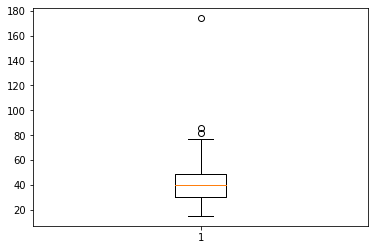

In [17]:
#checking for 'age' column in customers table
plt.boxplot(cust_demograp.age)
plt.show()

In [18]:
#checking for outliers
age_q1 = np.quantile(cust_demograp.age, 0.25)
age_q3 = np.quantile(cust_demograp.age, 0.75)
med = np.median(cust_demograp.age)
#finding iqr
age_iqr= age_q3-age_q1
age_upper= age_q3+(1.5*age_iqr)
age_lower= age_q1-(1.5*age_iqr)
print(age_iqr, age_upper, age_lower)

19.0 77.5 1.5


In [19]:
#removing outliers
cust_demograp=cust_demograp[(cust_demograp.age <=77.5) & (cust_demograp.age >=2)]
print(cust_demograp['age'].max(), cust_demograp['age'].min())

77 15


In [20]:
#changing 'gender' value to only 2 unique value
cust_demograp['gender']=cust_demograp['gender'].replace(['Femal','F'],'Female')
cust_demograp['gender']=cust_demograp['gender'].replace(['M'],'Male')
cust_demograp['gender']=cust_demograp['gender'].replace(['U'], cust_demograp['gender'].mode())


In [21]:
#removing deceased customer in 'deceased_indicator
cust_demograp = cust_demograp[cust_demograp.deceased_indicator != 'Y']
print(cust_demograp.isna().sum())

customer_id                            0
first_name                             0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
dtype: int64


In [22]:
print(cust_demograp.shape)

(3252, 9)


#### Cust_address Table

In [23]:
#Cleaning cust_address table
print(cust_address.isna().sum())


customer_id           0
state                 0
country               0
property_valuation    0
dtype: int64


In [24]:
cust_address['state']=cust_address['state'].replace(['New South Wales'], 'NSW')
cust_address['state']=cust_address['state'].replace(['Victoria'], 'VIC')

#### New_cust Table

In [25]:
#checking null from cust_demograp
print(new_cust.isna().sum())
print(new_cust.shape)

customer_id                              0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64
(1000, 15)


In [26]:
#removing null in 'job_industry_category' and 'DOB' column
print(new_cust.dropna(subset=['job_industry_category', 'DOB'], inplace=True))
print(new_cust.isna().sum())
print(new_cust.shape)

None
customer_id                             0
first_name                              0
last_name                              23
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
dtype: int64
(818, 15)


In [27]:
#changing 'DOB' column to 'age'
new_cust.rename({'DOB':'age'}, axis=1, inplace=True)
#changing'age' column type to datetime
new_cust['age']= pd.to_datetime(new_cust['age'])
#changing 'age' value from date to age
new_cust['age'] = ((snapshot1_date - new_cust['age']).dt.days)//365

In [28]:
print(new_cust.info())
print(new_cust.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          818 non-null    int64 
 1   first_name                           818 non-null    object
 2   last_name                            795 non-null    object
 3   gender                               818 non-null    object
 4   past_3_years_bike_related_purchases  818 non-null    int64 
 5   age                                  818 non-null    int64 
 6   job_industry_category                818 non-null    object
 7   wealth_segment                       818 non-null    object
 8   deceased_indicator                   818 non-null    object
 9   owns_car                             818 non-null    object
 10  address                              818 non-null    object
 11  postcode                             818 non-

### Merge Cust_demograp with Cust_address

In [29]:
#merging cust_demograp with cust_address to customers variable
customers = pd.merge(left=cust_demograp, right=cust_address, how='inner', on='customer_id')
print(customers.head())
print(customers.shape)

   customer_id first_name  gender  past_3_years_bike_related_purchases  age  \
0            1    Laraine  Female                                   93   64   
1            2        Eli    Male                                   81   37   
2            4     Talbot    Male                                   33   56   
3            6       Curr    Male                                   35   51   
4            7       Fina  Female                                    6   41   

  job_industry_category     wealth_segment deceased_indicator owns_car state  \
0                Health      Mass Customer                  N      Yes   NSW   
1    Financial Services      Mass Customer                  N      Yes   NSW   
2                    IT      Mass Customer                  N       No   QLD   
3                Retail     High Net Worth                  N      Yes   VIC   
4    Financial Services  Affluent Customer                  N      Yes   NSW   

     country  property_valuation  
0  Austra

In [30]:
print(transaction.info(),'\n')
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19821 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    19821 non-null  object        
 1   product_id        19821 non-null  object        
 2   customer_id       19821 non-null  int64         
 3   transaction_date  19821 non-null  datetime64[ns]
 4   online_order      19821 non-null  bool          
 5   order_status      19821 non-null  object        
 6   brand             19821 non-null  object        
 7   product_line      19821 non-null  object        
 8   product_class     19821 non-null  object        
 9   product_size      19821 non-null  object        
 10  list_price        19821 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 1.7+ MB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3249 entries, 0 to 3248
Data columns (tota

## 3. Exploratory Data

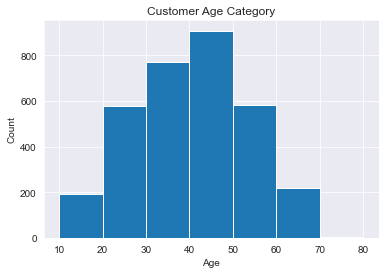

In [31]:
sns.set_style("darkgrid")
from matplotlib import cm as cm
my_colors = cm.get_cmap('tab20').colors
plt.hist(customers['age'], bins=[10,20,30,40,50,60,70,80])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Category')
plt.show()

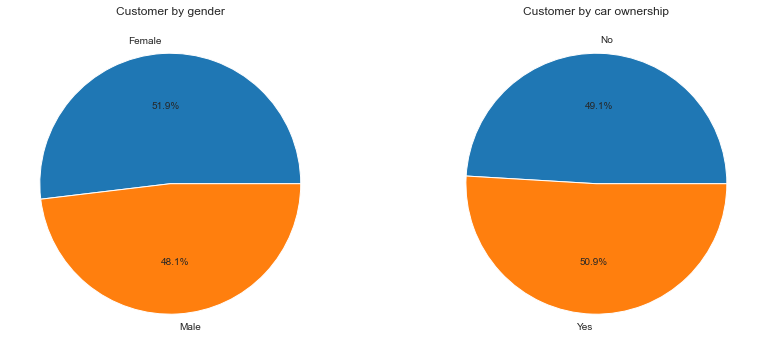

In [32]:
#checking for 'gender', 'owns_car', 'wealth_segment' columns
def plot_pie(column):
    return customers.groupby(column).customer_id.count().plot.pie(autopct='%1.1f%%')

plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
plt.title("Customer by gender")
plot_pie('gender')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Customer by car ownership")
plot_pie('owns_car')
plt.axis('off')
plt.show()

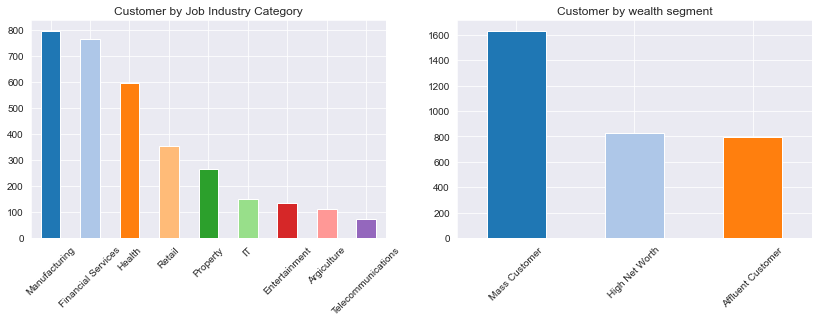

In [33]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Customer by Job Industry Category')
customers.groupby("job_industry_category").customer_id.count().sort_values(ascending=False).plot.bar(color=my_colors)
plt.xticks(rotation=45)
plt.xlabel('')

plt.subplot(1,2,2)
plt.title('Customer by wealth segment')
customers.groupby("wealth_segment").customer_id.count().sort_values(ascending=False).plot.bar(color=my_colors)
plt.xticks(rotation=45)
plt.xlabel('');
plt.show()

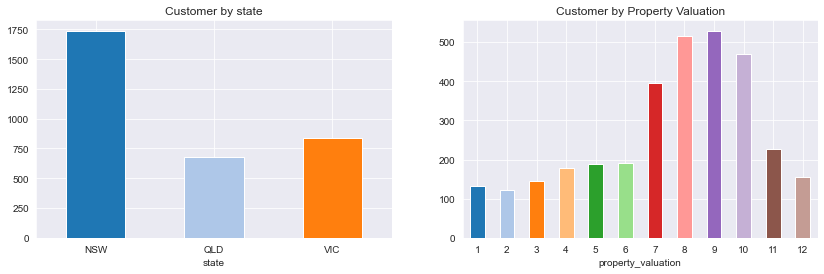

In [34]:
#checking for 'state' and 'property_valuation' in customers table
def plot_bar(column):
    return customers.groupby(column).customer_id.count().plot.bar(color=my_colors)

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.title("Customer by state")
plot_bar('state')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title("Customer by Property Valuation")
plot_bar('property_valuation')
plt.xticks(rotation=0)
plt.show()

### By exploring Customers dataset, we found:

- The majority of customers are in the age groups between 40 to 50.
- The client has slightly more female customers than male.
- Customers who own cars are 0.9% more than customers who don't own cars.
- Mass Customers has the largest portion of the customer base in terms of wealth segment.
- More than half of customers work in Manufacturing, Financial Services and the Health industries.
- Most of customers is from NSW or New South Wales.
- Most of customers own properties value from 7 to 10

## 4. RFM Analysis

In [35]:
#making variable for 'recency' column usage
snapshot_date = transaction['transaction_date'].max() + dt.timedelta(days=1)

#making new variable rfm for rfm model
rfm = transaction.sort_values(['customer_id']).groupby('customer_id').agg({
    'transaction_date' : lambda x:(snapshot_date - x.max()).days,
    'product_id' : 'count',
    'list_price' : 'sum'})
rfm.reset_index(inplace=True)

rfm.rename(columns={'transaction_date' : 'Recency',
                    'product_id' : 'Frequency',
                    'list_price' : 'Monetary'}, inplace=True)
print(rfm.head(),'\n')
print(rfm.describe())

   customer_id  Recency  Frequency  Monetary
0            1        8         11   9084.45
1            2      129          3   4149.07
2            3      103          8   9888.23
3            4      196          2   1047.72
4            5       17          6   5903.20 

       customer_id      Recency    Frequency      Monetary
count  3493.000000  3493.000000  3493.000000   3493.000000
mean   1751.275122    62.230461     5.674492   6285.198022
std    1011.744104    57.971602     2.311440   2941.998917
min       1.000000     1.000000     1.000000     60.340000
25%     877.000000    18.000000     4.000000   4162.960000
50%    1751.000000    45.000000     6.000000   5974.770000
75%    2625.000000    87.000000     7.000000   8157.720000
max    5034.000000   354.000000    14.000000  19071.320000


In [36]:
#making new columns for 'R', 'F', 'M' score
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)
rfm = rfm.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)
print(rfm.head())

   customer_id  Recency  Frequency  Monetary  R  F  M
0            1        8         11   9084.45  4  4  4
1            2      129          3   4149.07  1  1  1
2            3      103          8   9888.23  1  4  4
3            4      196          2   1047.72  1  1  1
4            5       17          6   5903.20  4  2  2


In [37]:
#joining RFM Score
def rfm_join(x):
    return (x['R']*100)+(x['F']*10)+(x['M'])

rfm['RFM_Value'] = rfm.apply(rfm_join, axis=1).astype(int)
print(rfm.info(), rfm.head(), '\n')
print(rfm['RFM_Value'].describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   customer_id  3493 non-null   int64   
 1   Recency      3493 non-null   int64   
 2   Frequency    3493 non-null   int64   
 3   Monetary     3493 non-null   float64 
 4   R            3493 non-null   category
 5   F            3493 non-null   category
 6   M            3493 non-null   category
 7   RFM_Value    3493 non-null   int32   
dtypes: category(3), float64(1), int32(1), int64(3)
memory usage: 133.5 KB
None    customer_id  Recency  Frequency  Monetary  R  F  M  RFM_Value
0            1        8         11   9084.45  4  4  4        444
1            2      129          3   4149.07  1  1  1        111
2            3      103          8   9888.23  1  4  4        144
3            4      196          2   1047.72  1  1  1        111
4            5       17          6   5903.20  4  2  2      

In [38]:
def generate_score(a):
    return a['R']+a['F']+a['M']
rfm['rfm_score']=rfm.apply(generate_score, axis=1).astype(int)

rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Value,rfm_score
0,1,8,11,9084.45,4,4,4,444,12
1,2,129,3,4149.07,1,1,1,111,3
2,3,103,8,9888.23,1,4,4,144,9
3,4,196,2,1047.72,1,1,1,111,3
4,5,17,6,5903.20,4,2,2,422,8


In [39]:
q1=(rfm['rfm_score'].quantile(0.2))
q2=(rfm['rfm_score'].quantile(0.4))
q3=(rfm['rfm_score'].quantile(0.6))
q4=(rfm['rfm_score'].quantile(0.8).astype(int))
print(q1, q2,q3,q4)
print(rfm['rfm_score'].min())

5.0 6.0 8.0 10
3


In [40]:
#splitting RFM to 5 category
def segment(rfm):
    if rfm['rfm_score'] > 10 :
        return 'Diamond'
    elif (rfm['rfm_score'] > 8) & (rfm['rfm_score'] <=10) :
        return 'Platinum'
    elif (rfm['rfm_score'] > 6) & (rfm['rfm_score'] <=8) :
        return 'Gold'
    elif (rfm['rfm_score'] > 4) & (rfm['rfm_score'] <=6) :
        return 'Silver'
    else :
        return 'Bronze'

rfm['customer_level'] = rfm.apply(segment, axis=1)
print(rfm['customer_level'].value_counts())
print(rfm.head())

Silver      834
Gold        819
Platinum    694
Bronze      652
Diamond     494
Name: customer_level, dtype: int64
   customer_id  Recency  Frequency  Monetary  R  F  M  RFM_Value  rfm_score  \
0            1        8         11   9084.45  4  4  4        444         12   
1            2      129          3   4149.07  1  1  1        111          3   
2            3      103          8   9888.23  1  4  4        144          9   
3            4      196          2   1047.72  1  1  1        111          3   
4            5       17          6   5903.20  4  2  2        422          8   

  customer_level  
0        Diamond  
1         Bronze  
2       Platinum  
3         Bronze  
4           Gold  


In [41]:
rfm_agg = rfm.groupby('customer_level', sort=True).agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
})
rfm_agg

Recency Frequency      Monetary      
                      mean      mean          mean count
customer_level                                          
Bronze          133.872699  3.024540   3071.861595   652
Diamond          17.502024  9.070850  10566.096457   494
Gold             45.785104  5.647131   6228.056056   819
Platinum         39.201729  7.319885   8320.279438   694
Silver           68.028777  4.392086   4624.267914   834

In [42]:
rfm_agg.reset_index(inplace=True)

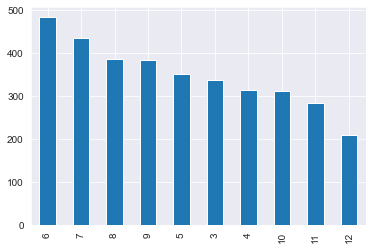

In [43]:
rfm.rfm_score.value_counts().plot.bar()
plt.show()

In [44]:
print(customers.shape)
print(rfm.shape)

(3249, 12)
(3493, 10)


In [45]:
customers = pd.merge(left=customers, right=rfm[['customer_id','customer_level']] , how='inner', on='customer_id')
print(customers.customer_level.value_counts())
print(customers.head())
print(customers.shape)

Silver      676
Gold        670
Platinum    571
Bronze      539
Diamond     392
Name: customer_level, dtype: int64
   customer_id first_name  gender  past_3_years_bike_related_purchases  age  \
0            1    Laraine  Female                                   93   64   
1            2        Eli    Male                                   81   37   
2            4     Talbot    Male                                   33   56   
3            6       Curr    Male                                   35   51   
4            7       Fina  Female                                    6   41   

  job_industry_category     wealth_segment deceased_indicator owns_car state  \
0                Health      Mass Customer                  N      Yes   NSW   
1    Financial Services      Mass Customer                  N      Yes   NSW   
2                    IT      Mass Customer                  N       No   QLD   
3                Retail     High Net Worth                  N      Yes   VIC   
4    Finan

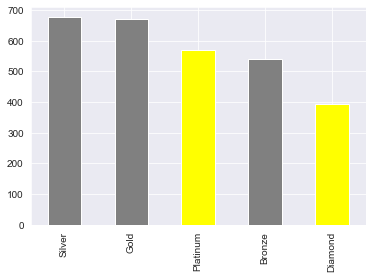

In [46]:
customers.customer_level.value_counts().plot.bar(color=['gray', 'gray', 'yellow', 'gray', 'yellow'])
plt.show()

In [47]:
#filtering only for diamond and platinum customer
prior_customers=customers[customers.customer_level.isin(['Diamond', 'Platinum'])]
print(prior_customers.head())
print(prior_customers.shape)

    customer_id first_name  gender  past_3_years_bike_related_purchases  age  \
0             1    Laraine  Female                                   93   64   
8            13   Gabriele    Male                                   38   62   
13           21       Mile    Male                                   74   37   
14           24        Kim  Female                                   55   40   
15           25      Geoff    Male                                   72   41   

   job_industry_category     wealth_segment deceased_indicator owns_car state  \
0                 Health      Mass Customer                  N      Yes   NSW   
8     Financial Services     High Net Worth                  N      Yes   VIC   
13         Manufacturing  Affluent Customer                  N      Yes   NSW   
14           Argiculture      Mass Customer                  N      Yes   NSW   
15    Financial Services      Mass Customer                  N      Yes   QLD   

      country  property_valuatio

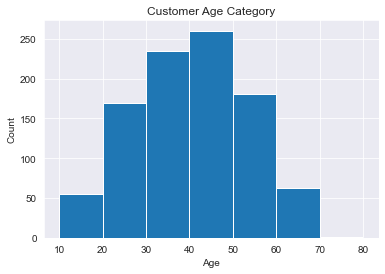

In [48]:
plt.hist(prior_customers['age'], bins=[10,20,30,40,50,60,70,80])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customer Age Category')
plt.show()

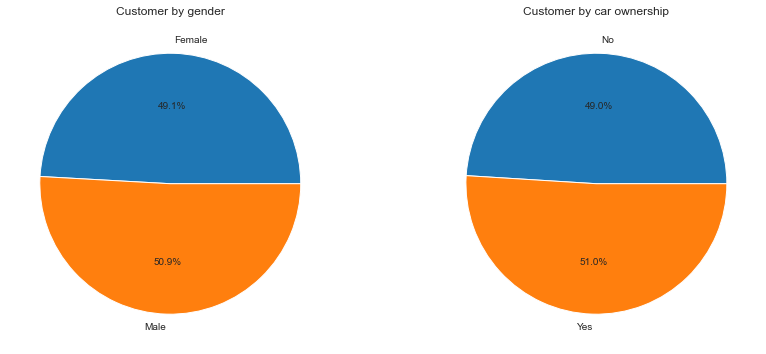

In [49]:
#checking for 'gender', 'owns_car', 'wealth_segment' columns in prior_customers
def plot_pie(column):
    return prior_customers.groupby(column).customer_id.count().plot.pie(autopct='%1.1f%%')

plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
plt.title("Customer by gender")
plot_pie('gender')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Customer by car ownership")
plot_pie('owns_car')
plt.axis('off')
plt.show()

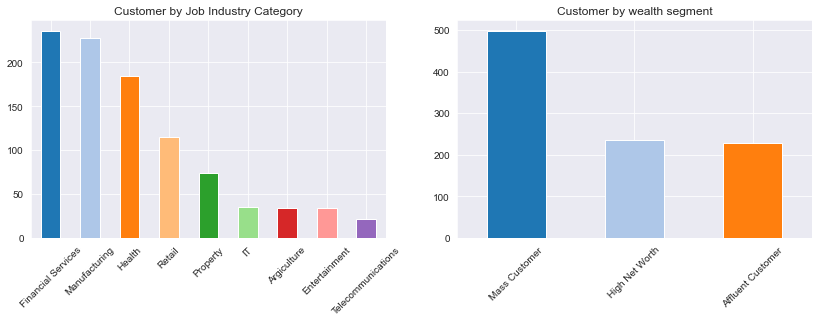

In [50]:
plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
plt.title('Customer by Job Industry Category')
prior_customers.groupby("job_industry_category").customer_id.count().sort_values(ascending=False).plot.bar(color=my_colors)
plt.xticks(rotation=45)
plt.xlabel('')

plt.subplot(1,2,2)
plt.title('Customer by wealth segment')
prior_customers.groupby("wealth_segment").customer_id.count().sort_values(ascending=False).plot.bar(color=my_colors)
plt.xticks(rotation=45)
plt.xlabel('');
plt.show()

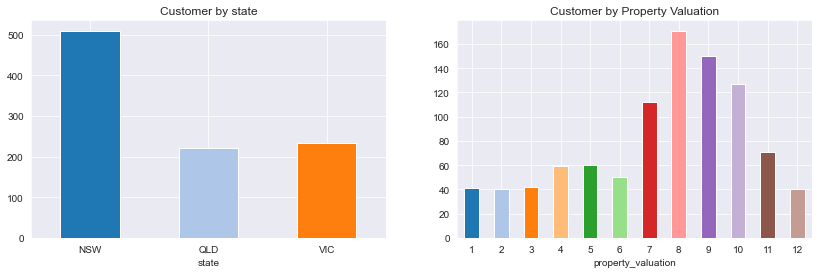

In [51]:
#checking for 'state' and 'property_valuation' in prior_customers table
def plot_bar(column):
    return prior_customers.groupby(column).customer_id.count().plot.bar(color=my_colors)

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
plt.title("Customer by state")
plot_bar('state')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
plt.title("Customer by Property Valuation")
plot_bar('property_valuation')
plt.xticks(rotation=0)
plt.show()

### By exploring Prior_customers, we found the characteristic targeted new customers :

- The targeted new customers must be in age between 20 to 60 years old.
- There is almost no difference in gender to be targeted.
- There is almost no difference in car ownership to be targeted.
- Mass Customers has the largest portion of the customer base in terms of wealth segment, High Net Worth and Affluent Customer  should be targeted too because they have purchasing power.
- More than half of customers work in Manufacturing, Financial Services, and Health industries and should be targeted.
- Most of customers is from NSW or New South Wales, QLD and VIC must be targeted too because they are in different state.
- Most of customers own properties value from 7 to 10 should be targeted.

In [52]:
#Filtering for which of the new customers Sprocket Central Pty Ltd should be targeted.
def targeted_cust(a):
    if ((a['age'] >=30) and (a['age'] <=50))  and ((a['job_industry_category']=='Financial Services') or (a['job_industry_category'] == 'Manufacturing') or (a['job_industry_category'] == 'Health'))  and ((a['property_valuation']>=7) and (a['property_valuation']<=10)):
        return 'Targeted'
    else:
        return 'Not Targeted'
    
new_cust['targeted_customer']=new_cust.apply(targeted_cust, axis=1,)

In [53]:
new_cust['targeted_customer'].value_counts()

Not Targeted    691
Targeted        127
Name: targeted_customer, dtype: int64

In [54]:
#List of targeted new customers
targeted_new_customers=new_cust[new_cust.targeted_customer == 'Targeted']
targeted_new_customers

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation,targeted_customer
6,4007,Rutledge,Hallt,Male,23,41,Financial Services,Mass Customer,N,No,7 Nevada Crossing,2620,NSW,Australia,7,Targeted
8,4009,Duff,Karlowicz,Male,50,45,Manufacturing,Mass Customer,N,Yes,717 West Drive,2200,NSW,Australia,10,Targeted
13,4014,Melba,Spellacy,Female,38,41,Health,Mass Customer,N,No,0591 Anzinger Circle,2232,NSW,Australia,10,Targeted
17,4018,Winnifred,Beswetherick,Female,83,41,Financial Services,Mass Customer,N,No,61 4th Street,3040,VIC,Australia,10,Targeted
20,4021,Teddie,Burchill,Male,11,49,Manufacturing,Mass Customer,N,Yes,321 Raven Plaza,2161,NSW,Australia,9,Targeted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,4950,Michele,Pammenter,Male,23,34,Health,High Net Worth,N,No,37 Mesta Road,3198,VIC,Australia,8,Targeted
955,4956,Maximilien,Bourget,Male,12,48,Financial Services,Mass Customer,N,Yes,2941 Loftsgordon Hill,3337,VIC,Australia,7,Targeted
960,4961,Sonia,Dunstall,Female,0,42,Financial Services,Mass Customer,N,No,99 Park Meadow Hill,2570,NSW,Australia,9,Targeted
964,4965,Jammie,Seldner,Female,42,42,Health,Mass Customer,N,Yes,8 Saint Paul Junction,2066,NSW,Australia,10,Targeted


In [55]:
#Save all dataframe to csv file for data visualization
new_cust.to_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\Data Analyst\new_customers.csv", index=False)
prior_customers.to_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\Data Analyst\priority_customers.csv", index=False)
targeted_new_customers.to_csv(r"D:\DATA ANALYST\Forage\KPMG data analytics\Data Analyst\targeted_new_customers.csv", index=False)